In [1]:
pip list --not-required

Package   Version
--------- -------
ipykernel 7.1.0
pip       24.3.1
scipy     1.16.3
seaborn   0.13.2
Note: you may need to restart the kernel to use updated packages.


# COVID-19 Data Analysis Project
Performs daily & weekly case calculation, rolling averages,
peak detection, and simple growth insight for selected countries
## Compatible with datasets from:
- Our World in Data (owid-covid-data.csv)
- WHO COVID dataset
- Kaggle COVID timeseries datasets

In [2]:
# Import section 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load Dataset 
csv_file = r'src\datasets\time_series_covid19_confirmed_global.csv'
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"File '{csv_file}' not found. Please place the dataset in this folder.")
    
df = pd.read_csv(csv_file)
backup = df.copy()
backup.to_csv("src/time_series_covid19_confirmed_global_backup.csv", index=False)
print(f"Loaded dataset: {csv_file}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")
print(df.head(n = 10))

Loaded dataset: src\datasets\time_series_covid19_confirmed_global.csv
Shape: (289, 1147)
Columns: ['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20

In [4]:
# State wise Covit cases 
df_cases = df.drop(columns=['Province/State', 'Lat', 'Long'], errors='ignore')
df_cases = df_cases.groupby("Country/Region").sum()
df_cases = df_cases.T
df_cases.index = pd.to_datetime(df_cases.index, format='%m/%d/%y')

In [5]:
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-03-05,209390,334427,271477,47875,105277,11,9106,10044125,446819,11385534,...,1034303,251071,12014,552051,11526966,703228,535,11945,343135,264127
2023-03-06,209406,334427,271477,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552125,11526966,703228,535,11945,343135,264127
2023-03-07,209436,334427,271490,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552157,11526986,703228,535,11945,343135,264127
2023-03-08,209451,334443,271494,47890,105288,11,9106,10044957,447308,11385534,...,1034303,251247,12014,552157,11526994,703228,535,11945,343135,264276
2023-03-09,209451,334457,271496,47890,105288,11,9106,10044957,447308,11399460,...,1034303,251247,12014,552162,11526994,703228,535,11945,343135,264276


In [6]:
# Daily new cases 
df_daily = df_cases.diff().clip(lower=0)
df_daily.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-03-05,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
2023-03-06,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-07,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
2023-03-08,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,0.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0
2023-03-09,0.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,13926.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Weekly cases 
df_weekly = df_cases.resample('W').sum()
df_weekly.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-02-12,1461863,2339591,1899827,334990,736288,77,63742,70282303,3123653,79257638,...,7232855,1755005,84098,3861697,80686388,4922596,3745,83615,2394120,1840063
2023-02-19,1463449,2339966,1899937,335044,736288,77,63742,70294952,3124324,79377553,...,7235861,1755896,84098,3863084,80687432,4922596,3745,83615,2396219,1844376
2023-02-26,1464480,2340439,1900032,335062,736393,77,63742,70303156,3126759,79507573,...,7238322,1756406,84098,3863618,80688060,4922596,3745,83615,2399661,1846889
2023-03-05,1465449,2340868,1900207,335107,736895,77,63742,70308875,3127733,79640586,...,7240121,1757219,84098,3864043,80688563,4922596,3745,83615,2401227,1848477
2023-03-12,837744,1337754,1085957,191530,421130,44,36424,40179828,1788254,45556062,...,4137212,1004636,48056,2208601,46107940,2812912,2140,47780,1372540,1056806


In [8]:
# weekly avg Cases
df_weekly_avg = df_cases.resample('W').mean()
df_weekly_avg.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-02-12,208837.571429,334227.285714,271403.857143,47855.714286,105184.000000,11.0,9106.0,10040329.0,446236.142857,1.132252e+07,...,1.033265e+06,250715.000000,12014.0,551671.000000,1.152663e+07,703228.0,535.0,11945.0,342017.142857,262866.142857
2023-02-19,209064.142857,334280.857143,271419.571429,47863.428571,105184.000000,11.0,9106.0,10042136.0,446332.000000,1.133965e+07,...,1.033694e+06,250842.285714,12014.0,551869.142857,1.152678e+07,703228.0,535.0,11945.0,342317.000000,263482.285714
2023-02-26,209211.428571,334348.428571,271433.142857,47866.000000,105199.000000,11.0,9106.0,10043308.0,446679.857143,1.135822e+07,...,1.034046e+06,250915.142857,12014.0,551945.428571,1.152687e+07,703228.0,535.0,11945.0,342808.714286,263841.285714
2023-03-05,209349.857143,334409.714286,271458.142857,47872.428571,105270.714286,11.0,9106.0,10044125.0,446819.000000,1.137723e+07,...,1.034303e+06,251031.285714,12014.0,552006.142857,1.152694e+07,703228.0,535.0,11945.0,343032.428571,264068.142857
2023-03-12,209436.000000,334438.500000,271489.250000,47882.500000,105282.500000,11.0,9106.0,10044957.0,447063.500000,1.138902e+07,...,1.034303e+06,251159.000000,12014.0,552150.250000,1.152698e+07,703228.0,535.0,11945.0,343135.000000,264201.500000


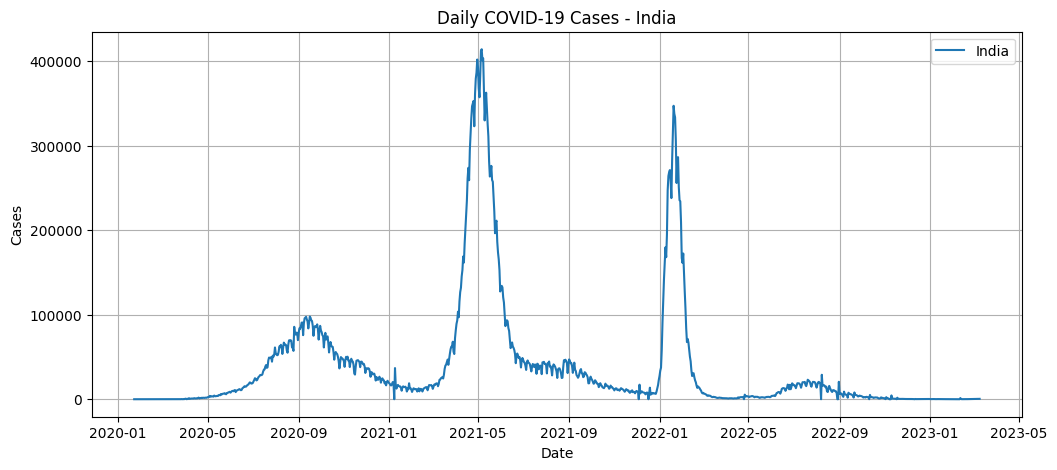

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df_daily.index, df_daily["India"], label="India")
plt.title("Daily COVID-19 Cases - India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
df['Country/Region'].unique

<bound method Series.unique of 0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object>

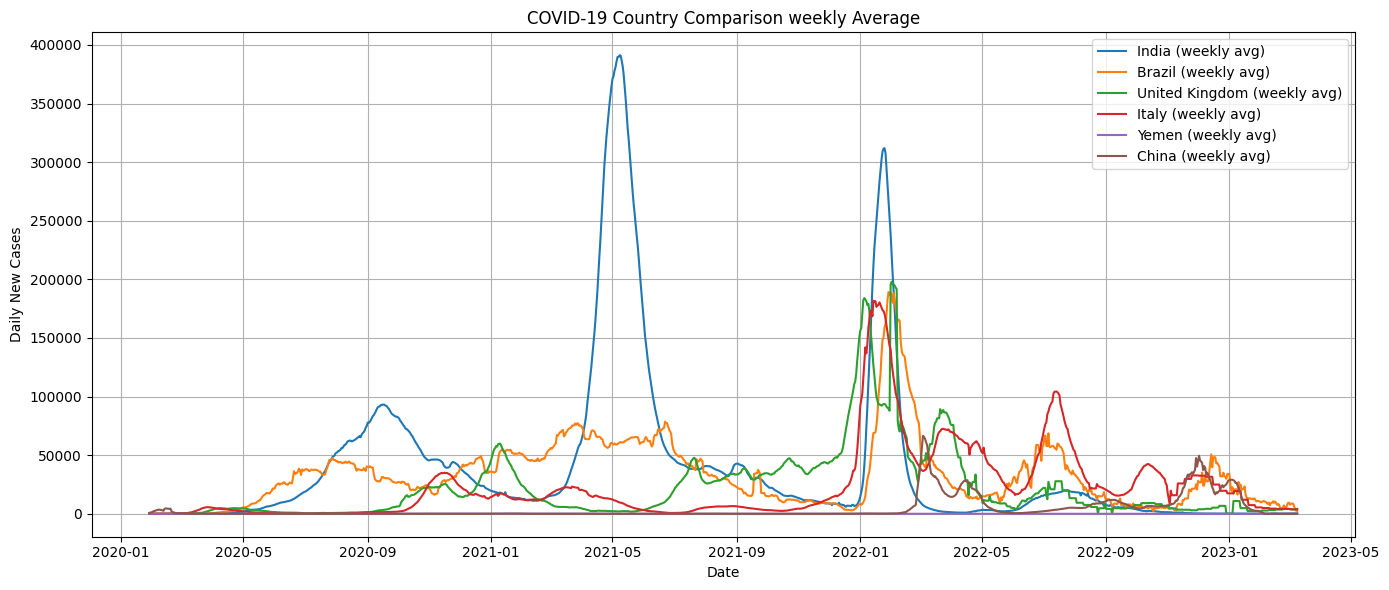

In [17]:
# compare multiple countries weekly avg
countries = ["India", "Brazil", "United Kingdom", "Italy", "Yemen", "China"]

plt.figure(figsize=(14,6))

for country in countries:
    if country in df_daily.columns:
        rolling = df_daily[country].rolling(7).mean()
        plt.plot(rolling, label=f"{country} (weekly avg)")

plt.title("COVID-19 Country Comparison weekly Average")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

filepath = f"SRC/charts/Country Comparison weekly Average.png"
plt.savefig(filepath, dpi=200, bbox_inches='tight')
plt.close()

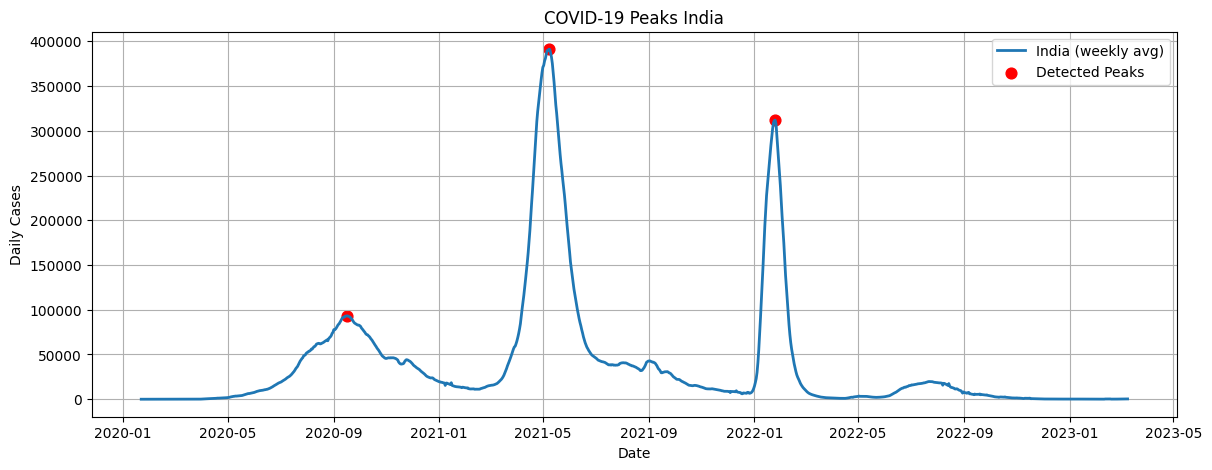

In [15]:
from scipy.signal import find_peaks

country = "India"
prominence = 30000

series = df_daily[country].rolling(7).mean().fillna(0)
peaks, props = find_peaks(series, prominence=prominence) 

plt.figure(figsize=(14,5))
plt.plot(series, label=f"{country} (weekly avg)", linewidth=2)

# Mark peaks
plt.scatter(series.index[peaks],
            series.iloc[peaks], 
            color='red',
            s=60,
            label="Detected Peaks")

plt.title(f"COVID-19 Peaks {country}")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.grid(True)
plt.legend()
plt.show()

filepath = f"SRC/charts/COVID-19 Peaks {country}.png"
plt.savefig(filepath, dpi=200, bbox_inches='tight')
plt.close()

# Reproduction Insight
R ≈ New cases previous week / New cases this week​

- R > 1 => growing
- R < 1 => declining

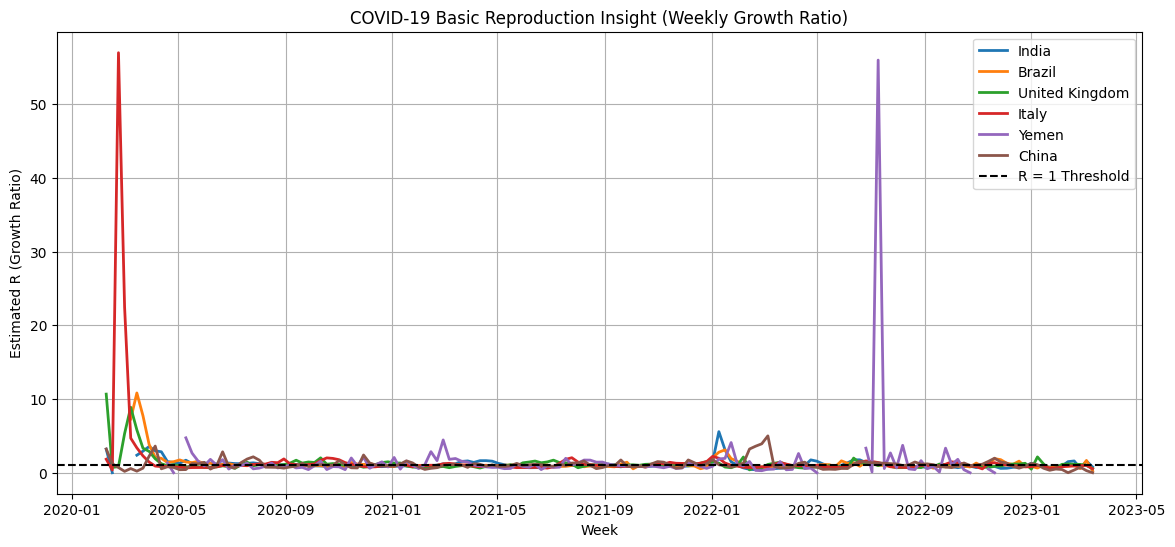

In [14]:
# Reproduction Insight Compare All countries
def compute_r(country, rolling_size=7):
    '''
    This is function. its return weekly growth ratio of given country
    
    inputs : country:'str' , rolling_size:'int' default = 7
    
    return => df.series
    '''
    series = df_daily[country].rolling(rolling_size).mean().fillna(0)
    weekly = series.resample("W").sum()  # weekly total cases
    r_value = weekly / weekly.shift(1)   # growth ratio

    return r_value

plt.figure(figsize=(14,6))

for country in countries:
    r_value = compute_r(country)
    plt.plot(r_value.index, r_value, label=country, linewidth=2)

plt.axhline(1.0, color="black", linestyle="--", label="R = 1 Threshold")

plt.title("COVID-19 Basic Reproduction Insight (Weekly Growth Ratio)")
plt.xlabel("Week")
plt.ylabel("Estimated R (Growth Ratio)")
plt.legend()
plt.grid(True)
plt.show()

filepath = f"SRC/charts/Basic Reproduction Insight.png"
plt.savefig(filepath, dpi=200, bbox_inches='tight')
plt.close()
